In [4]:
import pandas as pd
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import swifter
import numpy as np

In [5]:
df = pd.read_csv('Tweets.csv')

In [6]:
df.shape

(27481, 4)

In [7]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [8]:
column1 = df['text']
column2 = df['selected_text']

are_columns_same = (column1 == column2).all()

if are_columns_same:
    print("The two columns have the same values.")
else:
    print("The two columns do not have the same values.")

The two columns do not have the same values.


In [9]:
df.dtypes

textID           object
text             object
selected_text    object
sentiment        object
dtype: object

In [10]:
print(df['text'].dtype)

object


In [11]:
print(df['text'].isnull().sum())


1


In [12]:
rows_with_empty_values = df[df.isnull().any(axis=1)]

In [13]:
print(rows_with_empty_values)

         textID text selected_text sentiment
314  fdb77c3752  NaN           NaN   neutral


In [14]:
index_to_drop=314
df = df.drop(index_to_drop)

In [15]:
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [16]:
df['text'] = df['text'].str.lower()

In [17]:
df['selected_text'] = df['selected_text'].str.lower()

In [18]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [19]:
df['text'] = df['text'].apply(remove_url)

In [20]:
df['selected_text'] = df['selected_text'].apply(remove_url)

In [21]:
column_name= 'text'
tag_to_check = '<>'
rows_with_tag = df[df[column_name].str.contains(tag_to_check, na=False)]

In [22]:
rows_with_tag

,textID,text,selected_text,sentiment


In [23]:
column_name= 'selected_text'
tag_to_check = '<>'
rows_with_tag1 = df[df[column_name].str.contains(tag_to_check, na=False)]

In [24]:
rows_with_tag1

,textID,text,selected_text,sentiment


In [25]:
exclude = string.punctuation

In [26]:
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

In [27]:
df['text'] = df['text'].apply(remove_punc)

In [28]:
df['selected_text'] = df['selected_text'].apply(remove_punc)

In [29]:
def text_file_to_dict(file_path):
    result_dict = {}
    with open(file_path, 'r') as file:
        for line in file:
            if '=' in line:
                key, value = map(str.strip, line.strip().split('='))
            elif '-' in line:
                key, value = map(str.strip, line.strip().split('-'))
            else:
                continue
            result_dict[key] = value
    return result_dict

In [30]:
file_path = 'slang.txt'
my_dict = text_file_to_dict(file_path)

print(my_dict)

{'AFAIK': 'As Far As I Know', 'AFK': 'Away From Keyboard', 'ASAP': 'As Soon As Possible', 'ATK': 'At The Keyboard', 'ATM': 'At The Moment', 'A3': 'Anytime, Anywhere, Anyplace', 'BAK': 'Back At Keyboard', 'BBL': 'Be Back Later', 'BBS': 'Be Back Soon', 'BFN': 'Bye For Now', 'B4N': 'Bye For Now', 'BRB': 'Be Right Back', 'BRT': 'Be Right There', 'BTW': 'By The Way', 'B4': 'Before', 'CU': 'See You', 'CUL8R': 'See You Later', 'CYA': 'See You', 'FAQ': 'Frequently Asked Questions', 'FC': 'Fingers Crossed', 'FWIW': "For What It's Worth", 'FYI': 'For Your Information', 'GAL': 'Get A Life', 'GG': 'Good Game', 'GN': 'Good Night', 'GMTA': 'Great Minds Think Alike', 'GR8': 'Great!', 'G9': 'Genius', 'IC': 'I See', 'ICQ': 'I Seek you (also a chat program)', 'ILU': 'ILU: I Love You', 'IMHO': 'In My Honest/Humble Opinion', 'IMO': 'In My Opinion', 'IOW': 'In Other Words', 'IRL': 'In Real Life', 'KISS': 'Keep It Simple, Stupid', 'LDR': 'Long Distance Relationship', 'LMAO': 'Laugh My A.. Off', 'LOL': 'Laug

In [31]:
def chat_conversion(text):
    new_text=[]
    for w in text.split():
        if w.upper() in my_dict:
            new_text.append(my_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [32]:
df['text'] = df['text'].apply(chat_conversion)

In [33]:
df['selected_text'] = df['selected_text'].apply(chat_conversion)

In [34]:
# df['text'] = df['text'].swifter.apply(lambda x: TextBlob(x).correct().string)

In [35]:
# df['selected_text'] = df['selected_text'].apply(lambda x: TextBlob(x).correct().string)

In [36]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
# def remove_stopwords(text):
#     new_text = []
#     for w in text.split():
#         if w in stopwords.words('english'):
#             new_text.append('')
#         else:
#             new_text.append(w)
#     x = new_text[:]
#     new_text.clear()
#     return " ".join(x)

In [38]:
# df['text'] = df['text'].apply(remove_stopwords)

In [39]:
# df['selected_text'] = df['selected_text'].apply(remove_stopwords)

In [40]:
print("hello")

hello


In [41]:
# import emoji
# def has_emojis(text):
#     return any(emoji.is_emoji(char) for char in text) if isinstance(text, str) else False

In [42]:
# text_with_emoji = "Hello 😃"
# result = has_emojis(text_with_emoji)
# print(result)  # Should print True


In [43]:
# df['text_has_emojis'] = df['text'].apply(has_emojis)

In [44]:
# text_with_emoji = "Hello"
# result = has_emojis(text_with_emoji)
# print(result)  # Should print True

In [45]:
# print(df[['text', 'text_has_emojis']])

In [46]:
# df['text'] = df['text'].astype(str)

In [47]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def tokenize(text):
    text = str(text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    filtered_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    # Rejoining the tokens into a string
    return " ".join(filtered_tokens)
    # return " ".join(tokens)

In [50]:
  import nltk
  nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramvi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [51]:
df['text'] = df['text'].apply(tokenize)

In [52]:
df['selected_text'] = df['selected_text'].apply(tokenize)

In [53]:
df.head(2)

,textID,text,selected_text,sentiment
0,cb774db0d1,id respond go,id respond go,neutral
1,549e992a42,sooo sad miss san diego,sooo sad,negative


In [54]:
df

,textID,text,selected_text,sentiment
0,cb774db0d1,id respond go,id respond go,neutral
1,549e992a42,sooo sad miss san diego,sooo sad,negative
2,088c60f138,boss bulli,bulli,negative
3,9642c003ef,interview leav alon,leav alon,negative
4,358bd9e861,son couldnt put releas alreadi bought,son,negative
...,...,...,...,...
27476,4eac33d1c0,wish could come see you denver husband lost jo...,lost,negative
27477,4f4c4fc327,ive wonder rake client made clear net dont for...,dont forc,negative
27478,f67aae2310,yay good enjoy break probabl need hectic weeke...,yay good,positive
27479,ed167662a5,worth,worth,positive


In [55]:
df = df.drop('textID', axis = 1)

In [56]:
df

,text,selected_text,sentiment
0,id respond go,id respond go,neutral
1,sooo sad miss san diego,sooo sad,negative
2,boss bulli,bulli,negative
3,interview leav alon,leav alon,negative
4,son couldnt put releas alreadi bought,son,negative
...,...,...,...
27476,wish could come see you denver husband lost jo...,lost,negative
27477,ive wonder rake client made clear net dont for...,dont forc,negative
27478,yay good enjoy break probabl need hectic weeke...,yay good,positive
27479,worth,worth,positive


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# X = df['text'] 
# y = df['sentiment']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
# vectorizer = TfidfVectorizer()
# X_train_vectors = vectorizer.fit_transform(X_train)
# X_test_vectors = vectorizer.transform(X_test)

In [61]:
# from sklearn.svm import SVC

In [62]:
# model = SVC()
# model.fit(X_train_vectors, y_train)

In [63]:
# from sklearn.metrics import classification_report, accuracy_score

In [64]:
# y_pred = model.predict(X_test_vectors)

# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# print("Accuracy Score:", accuracy_score(y_test, y_pred))

In [65]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

In [66]:
# def transformer_model(embed_dim, num_heads, ff_dim, input_len, output_len, dropout=0.1):
#     inputs = layers.Input(shape=(input_len,))

#     # Embedding layer
#     embedding_layer = TokenAndPositionEmbedding(input_len, embed_dim)
#     x = embedding_layer(inputs)

#     # Transformer block
#     for _ in range(num_heads):
#         x = TransformerBlock(embed_dim, num_heads, ff_dim, dropout)(x)

#     # Output layer
#     x = layers.GlobalAveragePooling1D()(x)
#     x = layers.Dropout(dropout)(x)
#     x = layers.Dense(20, activation="relu")(x)
#     x = layers.Dropout(dropout)(x)
#     outputs = layers.Dense(output_len, activation="softmax")(x)

#     model = keras.Model(inputs=inputs, outputs=outputs)

#     return model


In [67]:
# class TokenAndPositionEmbedding(layers.Layer):
#     def __init__(self, maxlen, embed_dim):
#         super(TokenAndPositionEmbedding, self).__init__()
#         self.token_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)
#         self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

#     def call(self, x):
#         maxlen = tf.shape(x)[-1]
#         positions = tf.range(start=0, limit=maxlen, delta=1)
#         positions = self.pos_emb(positions)
#         x = self.token_emb(x)
#         return x + positions

# class TransformerBlock(layers.Layer):
#     def __init__(self, embed_dim, num_heads, ff_dim, dropout=0.1):
#         super(TransformerBlock, self).__init__()
#         self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
#         self.ffn = keras.Sequential(
#             [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim)]
#         )
#         self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
#         self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
#         self.dropout1 = layers.Dropout(dropout)
#         self.dropout2 = layers.Dropout(dropout)

#     def call(self, inputs, training):
#         attn_output = self.att(inputs, inputs)
#         attn_output = self.dropout1(attn_output, training=training)
#         out1 = self.layernorm1(inputs + attn_output)

#         ffn_output = self.ffn(out1)
#         ffn_output = self.dropout2(ffn_output, training=training)
#         return self.layernorm2(out1 + ffn_output)


In [68]:
# X = df['text'] 
# y = df['sentiment']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# num_classes = len(set(y_train))

In [70]:
# num_classes

In [71]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

In [72]:
# from tensorflow.keras.utils import to_categorical

# y_train_one_hot = to_categorical(y_train_encoded, num_classes=3)
# y_test_one_hot = to_categorical(y_test_encoded, num_classes=3)

In [73]:
# model = transformer_model(embed_dim=32, num_heads=2, ff_dim=32, input_len=100, output_len=num_classes)
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [74]:
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

In [75]:
corpus = []
for sent in df['text']:
    corpus.append(sent)

In [76]:
# corpus

In [78]:
import nltk 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [79]:
from nltk.tokenize import sent_tokenize, word_tokenize

# Download the punkt tokenizer if not already downloaded
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [80]:
tokens = []
for sent in corpus:
    sent_token = (sent_tokenize(sent))
    for word in sent_token:
        tokens.append(word_tokenize(word))

In [81]:
# tokens

In [82]:
vocab = set(word for sentence in tokens for word in sentence)

In [83]:
word_to_index = {word: index for index, word in enumerate(vocab)}
index_to_word = {index: word for index, word in enumerate(vocab)}

In [84]:
target_dict = {'negative':0, 'neutral':1, 'positive':2}
def training_dataset(tokens, word_to_index, sentiment, target_dict):
    X,y = [],[]
    for sentence, senti in zip(tokens, sentiment):
        temp_x = [word_to_index[word] for word in sentence]
        X.append(temp_x)
        y.append(target_dict[senti])
    X = pad_sequences(X, padding = 'post')
    return np.array(X), np.array(y)

In [85]:
X,y = training_dataset(tokens, word_to_index, df['sentiment'], target_dict)

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
x_train.shape, x_test.shape, y_test.shape, y_train.shape

((21941, 30), (5486, 30), (5486,), (21941,))

In [97]:
# x_train = x_train.reshape(x_train.shape[0], 1, 30)
# x_test = x_test.reshape(x_test.shape[0],1,30)
x_train = x_train.reshape(x_train.shape[0], 30)  # Shape: (samples, timesteps, 1)
x_test = x_test.reshape(x_test.shape[0], 30)

In [98]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout

model = Sequential()
model.add(Embedding(input_dim=len(word_to_index), output_dim=128))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 output classes
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [99]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.4054 - loss: 1.0899 - val_accuracy: 0.3951 - val_loss: 1.0899
Epoch 2/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.4066 - loss: 1.0872 - val_accuracy: 0.3951 - val_loss: 1.0905
Epoch 3/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.4060 - loss: 1.0878 - val_accuracy: 0.3953 - val_loss: 1.0901
Epoch 4/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.4429 - loss: 1.0593 - val_accuracy: 0.3390 - val_loss: 1.1147
Epoch 5/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.5275 - loss: 0.9513 - val_accuracy: 0.3648 - val_loss: 1.1752
Epoch 6/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.6226 - loss: 0.7913 - val_accuracy: 0.3534 - val_loss: 1.2912
Epoch 7/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.7172 - loss: 0.6278 - val_accuracy: 0.3634 - val_loss: 1.5378
Epoch 8/10
549/549 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.7833 - loss: 0.4891 - 

In [100]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

172/172 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.3579 - loss: 2.1574
Test Accuracy: 0.35


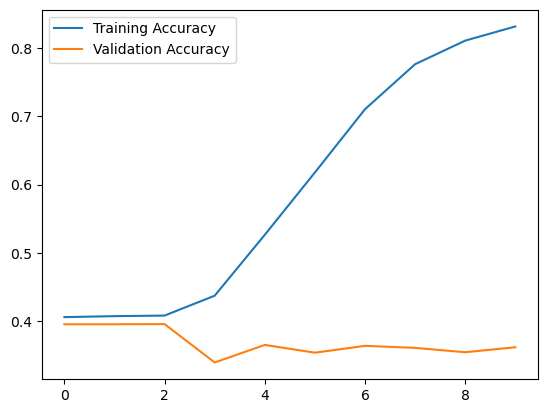

In [101]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [102]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)


172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


In [103]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predicted_classes))
print(confusion_matrix(y_test, predicted_classes))


              precision    recall  f1-score   support

           0       0.29      0.20      0.24      1554
           1       0.40      0.52      0.45      2200
           2       0.31      0.27      0.29      1732

    accuracy                           0.35      5486
   macro avg       0.34      0.33      0.33      5486
weighted avg       0.34      0.35      0.34      5486

[[ 316  808  430]
 [ 421 1153  626]
 [ 336  920  476]]
